In [13]:
# Some imports to get us started
# Utilities
import os
import urllib.request
import numpy as np
import pandas as pd

# Generic ML imports
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor

# EconML imports
from econml.dml import LinearDML, CausalForestDML
from econml.cate_interpreter import SingleTreeCateInterpreter, SingleTreePolicyInterpreter

import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
data = pd.read_csv("./data/format_data/data.csv")
data = data[data.columns[:8]]

In [25]:
train_data.shape

In [24]:
train_data = data.loc[:150000,:]
test_data = data.loc[150000:,:]

In [20]:
# Define estimator inputs
Y = train_data["tobinq"]  # outcome of interest
T = train_data["treat"]  # intervention, or treatment
X = train_data[["fixed_asset_ratio","cash_ratio"]]  # features
W = train_data.drop(columns=["tobinq", "treat", "fixed_asset_ratio","cash_ratio","stkcd"])  # confounders

In [26]:
X_test = test_data[["fixed_asset_ratio","cash_ratio"]]

In [27]:
est = CausalForestDML(
    model_y=GradientBoostingRegressor(), model_t=GradientBoostingRegressor()
)
est.fit(Y, T, X=X, W=W, inference="blb")

In [28]:
# Get treatment effect and its confidence interval
te_pred = est.effect(X_test)
te_pred_interval = est.effect_interval(X_test)

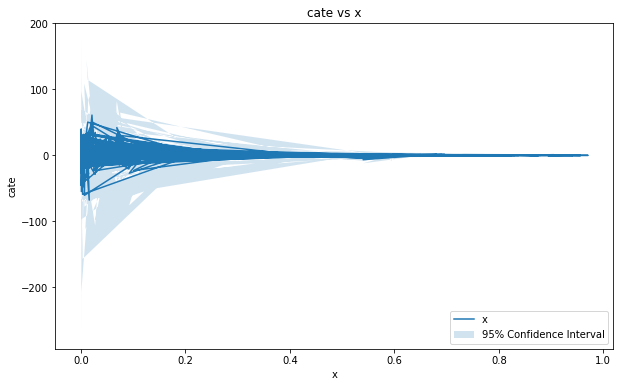

In [34]:
# Compare the estimate and the truth
plt.figure(figsize=(10, 6))
plt.plot(X_test.iloc[:,0], te_pred, label="x")
plt.fill_between(
    X_test.iloc[:,0],
    te_pred_interval[0],
    te_pred_interval[1],
    alpha=0.2,
    label="95% Confidence Interval",
)
# plt.fill_between(
#     X_test.flatten(),
#     truth_te_lower,
#     truth_te_upper,
#     alpha=0.2,
#     label="True Elasticity Range",
# )
plt.xlabel("x")
plt.ylabel("cate")
plt.title("cate vs x")
plt.legend(loc="lower right")

In [35]:
est.summary()

Population summary results are available only if `cache_values=True` at fit time!
Doubly Robust ATE on Training Data Results:  Doubly Robust ATE calculation on training data is available only on discrete treatments!
Doubly Robust ATT on Training Data Results:  Doubly Robust ATT calculation on training data is available only on discrete treatments!
